Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Maria Baba"
STUDENT_ID = "14201089"

---

*Objective*: Apply topic modelling techniques, such as Latent Dirichlet Allocation (LDA), to analyze and interpret the primary topics present in a collection of online news articles.

Topic modelling is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. It is a frequently used text-mining tool for the discovery of hidden semantic structures in a text body. This assignment involves implementing and interpreting LDA topic modelling on a dataset of online news articles to understand the prevalent themes and topics.

For this task, you will use the "Fake news" dataset, which contains information about a large number of fake news articles. The dataset is available here: https://www.kaggle.com/datasets/mrisdal/fake-news.

1. Prepare: Explore the dataset
2. Pre-process the text data
3. Implement the LDA model
4. Analyze the topics and interpret the results

### Setup and requirements
First, make sure that you have the needed libraries for Python correctly installed.

In [2]:
#!pip install numpy pandas matplotlib sklearn gensim nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora, models
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Prepare and Explore the Dataset (1 point)

The first step is to download and load the dataset. Familiarize yourself with its structure and content. Understand the kind of articles included, and how the data is organized.


1. Load the dataset using pandas.
2. Explore the dataset. What columns does it include? How are the articles represented?
3. For exploration purposes and initial model training take 15-35% sample of dataframe using the sample method in pandas
4. Store your dataset in the variable named `news_df`

In [3]:
import pandas as pd

news_df = pd.read_csv('fake.csv')
#Select a sample of 30%
news_df= news_df.sample(frac=0.3)
display(news_df)

uuid  ord_in_thread  \
3998   786fb2effb9804a304ba66365e3602fabc065ae1              0   
8882   d010219b63f4f9b9e86976075ea00c0f1cb85fce              0   
11737  165574d6908abf3aa94919a39ed3b92e2bd0d734              0   
5355   ddbdb333001d31bc27dd23ddb561c3ca418e1255              0   
3253   0d961f483632d7525c36f635502ab832ac3d57fa              0   
...                                         ...            ...   
12968  7204326819e407005ff9c868120ff51d97f54ffd             13   
8240   834a1dc517df9f9b6e6b2cfb446176c060f201df              0   
577    3dbdd44d5f0ebef00bc0c98e53a90e8908772efc              0   
3178   1a1e29ab3097cfc7fef911782fae319eb0d491ed              0   
6820   6c04e9724cec390aa63035a6e492dd2ae1fe99fa              0   

                                author                      published  \
3998   Anonymous Coward (UID 73268493)  2016-10-26T22:54:28.722+03:00   
8882                               NaN  2016-10-27T20:17:42.514+03:00   
11737                     Paul Nachman  2016-11-05T22:00:33.955+02:00   
5355                             admin  2016-10-29T21:15:02.272+03:00   
3253                              Alma  2016-11-05T19:42:40.190+02:00   
...                                ...                            ...   
12968                    gatorengineer  2016-10-27T00:37:44.262+03:00   
8240                               NaN  2016-10-27T02:20:58.463+03:00   
577                        Henry Wolff  2016-11-04T06:02:00.000+02:00   
3178                         Dr. Eowyn  2016-10-28T18:03:15.178+03:00   
6820                      Colin Taylor  2016-10-28T02:35:00.000+03:00   

                                                   title  \
3998                Proof of otherwordly presence - link   
8882   Lesson learned? Goldman Sachs says not to expe...   
11737  Bill Clinton Used To Call Illegal Aliens [Gasp...   
5355   Syrian Mother: ISIS Baked Christians Adults, ‘...   
3253   Comment on Weiner Forcefully Removed From Hill...   
...                                                  ...   
12968                                                NaN   
8240   الجيش اليمني يهاجم قوات الحوثيين في محافظة مأر...   
577    U-M’s New ‘Chief Diversity Officer’ Will Colle...   
3178   Comment on Mayor de Blasio claims hot dog cart...   
6820   A New Victim Just Accused Clarence Thomas Of S...   

                                                    text language  \
3998   Proof of otherwordly presence - link this guy ...  english   
8882   Thu, 27 Oct 2016 17:02 UTC © Daniel Acker-Bloo...  english   
11737                                                     english   
5355   by FRANCES MARTEL A Syrian Christian mother sh...  english   
3253   Anthony Weiner and Human Abedin have reportedl...  english   
...                                                  ...      ...   
12968  But I think it should be mathematically fluid ...  english   
8240   الجيش اليمني يهاجم قوات الحوثيين في محافظة مأر...   arabic   
577    U-M’s New ‘Chief Diversity Officer’ Will Colle...  english   
3178   Posted on October 28, 2016 by DCG | 2 Comments...  english   
6820     \nIn light of the tidal wave of sexual assau...  english   

                             crawled                  site_url country  \
3998   2016-10-26T22:54:28.722+03:00    godlikeproductions.com      US   
8882   2016-10-27T20:17:42.514+03:00                  sott.net      US   
11737  2016-11-05T22:00:33.955+02:00                 vdare.com      US   
5355   2016-10-29T21:15:02.272+03:00            jewsnews.co.il      US   
3253   2016-11-05T19:42:40.190+02:00  fellowshipoftheminds.com      US   
...                              ...                       ...     ...   
12968  2016-10-27T00:37:44.262+03:00             zerohedge.com      US   
8240   2016-10-27T02:20:58.463+03:00                    rt.com      NL   
577    2016-11-04T14:13:12.728+02:00                 amren.com      US   
3178   2016-10-28T18:03:15.178+03:00  fellowshipoftheminds.com      US   
6820   20

In [4]:
assert 1949 <= len(news_df) <= 4550, "You should sample between 15-35% of the dataset."

### Question 1: Dataset Exploration (1 point)


What are the key characteristics of this dataset? Describe the dataset in terms of its size, variety of articles, and any other notable features.

In [5]:

#The sample dataset shows a distribution of multiple articles, along with the author, date of publication, title and language they were written in. 
# The articles are written in multiple languages and the topics vary but some of the ones presented in the sample cover politics within the United States, as indicated by their title. 

#Number of articles in sample dataframe
size= news_df["text"]
size_dataframe=len(size)
print(f'The number of articles present in the sample dataframe is {size_dataframe}')

#Languages of articles and number of articles in the specific language
languages = news_df['language'].value_counts()
print(f'\nLanguages and number of articles in respective language:\n{languages}')

#Country of origin of articles
countries = news_df['country'].value_counts()
print(f'\n Countries and articles number of articles released from each: \n {countries}')



The number of articles present in the sample dataframe is 3900

Languages and number of articles in respective language:
language
english       3711
russian         58
spanish         52
german          44
french          13
arabic           8
ignore           4
portuguese       4
italian          3
norwegian        2
dutch            1
Name: count, dtype: int64

 Countries and articles number of articles released from each: 
 country
US    3134
GB     250
RU     110
DE      69
FR      66
TV      57
ES      32
EU      27
CA      24
NL      20
IS      19
IN      13
ME      11
CO       7
BG       5
EE       3
IR       2
LI       2
Name: count, dtype: int64


## 2. Pre-process the Text Data

Before applying topic modelling, it's crucial to pre-process the text data. This involves cleaning the text, removing stop words, and converting the text into a suitable format for analysis.

1. Complete the `preprocess_text()` function to clean the text data (remove punctuation, lowercase, tokenize, lemmatize).
2. Remove stopwords using the NLTK library.
3. Create a corpus required for the LDA model using the gensim package and save it in variable `corpus`.
3. Convert the cleaned text into a document-term matrix using the gensim package and save it in variable `doc_term_matrix`.

In [6]:
#Convert column to list
t_list=news_df['text'].tolist()

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel



lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    #Set stopwords from nlkt library
    stop= set(stopwords.words('english'))

    if not isinstance(text, float):
    #Remove punctuation
        txt=text.maketrans("", "", string.punctuation)
        pun_removed=text.translate(txt)

    #Transform to lowercase
        lowercase_words= text.lower()

    #Tokenize words
        tokens=lowercase_words.split()
    
    #Lemmatize words
        lem_words=[lemmatizer.lemmatize(x) for x in tokens if x not in stop and x.isalpha()]
        return(lem_words)

processed_result=[preprocess_text(text) for text in t_list ]

#Remove empty lists and None type objects
final= [text for text in processed_result if text]

#Create corpus
corpus= corpora.Dictionary(final)

#Create document to term matrix
doc_term_matrix = [corpus.doc2bow(words) for words in final]



In [8]:
display(doc_term_matrix)

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(11, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 7),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 3),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 1),
  (81, 4),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 3

Public test (1 point)

In [9]:
assert type(doc_term_matrix) == list, "doc_term_matrix should be a list of lists"
assert type(corpus) == gensim.corpora.dictionary.Dictionary, "corpus should be a gensim.corpora.dictionary.Dictionary"

Hidden tests (2 points)

### Question 2: Pre-processing Importance (2 points)

Why is pre-processing important in topic modelling? Describe how each step in the pre-processing pipeline contributes to the overall analysis.

YOUR ANSWER HERE: Preprocessing is important because it cleans and transforms the data into values that can be processed through the model. By doing this, the results of the model can be more accurate. As shown in the function implemented above, each step is very important in shaping the data. Stopwords, which are words that do not offer any special meaning for topic modelling, are removed in order to imporve the coherence of topics. The next step is to remove punctuation and any speical characters in order to be able to properly model the word distribution. Similarly, all words are converted to lower case to prevent the model from treating the same words as different entitites because of capitalized letters. Then, the text is broken into smaller parts, tokens, to allow for a better processing. Lastly, each token goes through lemmatization to remove inflectional endings.


Reference: Tornberg, P. (2023)."Introduction to Natural Language Processing"[PowerPoint Slides]. Canvas@UVA. https://canvas.uva.nl/courses/39886/pages/lecture-machine-learning-and-natural-language-processing-tuesday-nov-14?module_item_id=1740354

## 3. Implement the LDA Model (1 point)

Now, it's time to implement the LDA model using the Gensim library. Be sure to check out the documentation for hyperparameter settings.

1. Choose the number of topics for the model. This is a crucial step and may require some experimentation.
2. Train the LDA model on the dataset.
3. Save the model for future use.

In [10]:
topics= 10
lda_model = LdaModel(corpus=doc_term_matrix, id2word= corpus, num_topics=topics )

In [11]:
assert type(lda_model) == gensim.models.ldamodel.LdaModel, "lda_model should be a gensim.models.ldamodel.LdaModel"
lda_model.save('lda_model.model')

### Question 3: Model Parameters (2 points)

Discuss the choice of number of topics for the LDA model. How does this choice impact the model's performance and the interpretability of the results?

YOUR ANSWER HERE: I chose 10 topics for the LDA model as this ensures that I cover a larger number of subjects considering the size of the sample, but it is also relatively small to keep the running time shorter while working on the sample. This choice can make the results harder to interpret as it can under or overestimate and lead to an innacurate performance, especially for such a large sample size.

## 4. Analyze Topics and Interpret Results (1 point)

Finally, analyze the topics produced by the LDA model and interpret the results.

1. Use the LDA model to identify the main topics in the dataset.
2. For each topic, examine the most representative words.
4. Interpret the topics: What themes or subjects do they represent?

### Question 4: Topic Interpretation

Interpret the topics generated by the LDA model. How coherent are the topics? What do they tell us about the content of the dataset? Does this model need improvement by modifying parameters, using further pre-processing?

In [12]:
#Identify topics
dataset_topics= [lda_model.get_document_topics(topic) for topic in doc_term_matrix]

#Find most representative words
word_representation=lda_model.print_topics()
for idx,topic in word_representation:
    print(f'Topic:{idx}\nDistribution of representative words: {topic}')



Topic:0
Distribution of representative words: 0.006*"one" + 0.005*"also" + 0.005*"der" + 0.004*"die" + 0.004*"people" + 0.003*"get" + 0.003*"clinton" + 0.003*"may" + 0.003*"u" + 0.003*"would"
Topic:1
Distribution of representative words: 0.026*"в" + 0.023*"и" + 0.013*"что" + 0.011*"на" + 0.011*"не" + 0.009*"это" + 0.008*"с" + 0.006*"мы" + 0.005*"я" + 0.005*"как"
Topic:2
Distribution of representative words: 0.030*"de" + 0.018*"la" + 0.012*"que" + 0.012*"el" + 0.009*"en" + 0.005*"trump" + 0.005*"los" + 0.005*"e" + 0.004*"un" + 0.004*"del"
Topic:3
Distribution of representative words: 0.004*"one" + 0.004*"trump" + 0.004*"russian" + 0.004*"people" + 0.004*"hillary" + 0.004*"clinton" + 0.003*"like" + 0.003*"u" + 0.003*"obama" + 0.003*"russia"
Topic:4
Distribution of representative words: 0.011*"clinton" + 0.010*"trump" + 0.006*"hillary" + 0.005*"u" + 0.005*"american" + 0.005*"would" + 0.004*"campaign" + 0.004*"russian" + 0.004*"also" + 0.004*"election"
Topic:5
Distribution of representativ

YOUR ANSWER HERE: The topics are not as coherent, but the implied content is similar as it covers subjects like the US elections, Trump versus Clinton and possible effects of this election on the world. The model definetly needs by pre-processing in terms of eliminating foregin languages and words that do not offer any signficant meanings in the context of each topic.

## Question 5: Improving Preprocessing for Topic Modeling (1 point)

### Objective:
Enhance your understanding and skills in preprocessing text data for topic modeling. You will focus on two key areas: 
1. Subsetting posts by language (focusing on English).
2. Enriching the list of stopwords specific to your dataset for more effective topic modeling by adding custom stopwords. Analyze the results to identify irrelevant or overly common words that could be added to your stopwords list.
3. **Re-run Topic Modeling**: Apply the enriched stopwords list and re-run the topic modeling process.

In [13]:
# subset dataset by english articles

news_df= news_df[(news_df["language"]=="english")]
english_list=news_df['text'].tolist()


custom_stopwords = ["also", "u", "one", "would", "like", "could", "new", "even", "said"]


def preprocess_text_2(text):
    #Set stopwords from nlkt library
    stop= set(stopwords.words('english'))
    stop.update(custom_stopwords)

    if not isinstance(text, float):
    #Remove punctuation
        txt=text.maketrans("", "", string.punctuation)
        pun_removed=text.translate(txt)

    #Transform to lowercase
        lowercase_words= text.lower()

    #Tokenize words
        tokens=lowercase_words.split()
    
    #Lemmatize words
        lem_words=[lemmatizer.lemmatize(x) for x in tokens if x not in stop and x.isalpha()]
        return(lem_words)

processed_result_2=[preprocess_text_2(text) for text in english_list ]

final_2= [text for text in processed_result_2 if text]


In [14]:
#Create corpus
corpus_2= corpora.Dictionary(final_2)

#Create doc to term matrix
doc_term_matrix_2 = [corpus_2.doc2bow(words) for words in final_2]

topics= 10
lda_model_2 = LdaModel(corpus=doc_term_matrix_2, id2word= corpus_2, num_topics=topics )

In [15]:
#Identify topics
dataset_topics_2= [lda_model.get_document_topics(topic) for topic in doc_term_matrix_2]

#Find most representative words
word_representation_2=lda_model_2.print_topics()
for idx,topic in word_representation_2:
    print(f'Topic:{idx}\nDistribution of representative words: {topic}')

Topic:0
Distribution of representative words: 0.006*"people" + 0.005*"u" + 0.005*"trump" + 0.005*"clinton" + 0.004*"state" + 0.004*"russian" + 0.004*"time" + 0.003*"hillary" + 0.003*"american" + 0.003*"government"
Topic:1
Distribution of representative words: 0.016*"trump" + 0.011*"clinton" + 0.009*"hillary" + 0.005*"election" + 0.005*"donald" + 0.004*"people" + 0.004*"vote" + 0.004*"american" + 0.004*"many" + 0.004*"state"
Topic:2
Distribution of representative words: 0.006*"people" + 0.004*"u" + 0.004*"world" + 0.003*"american" + 0.003*"time" + 0.003*"year" + 0.003*"may" + 0.003*"state" + 0.003*"take" + 0.003*"war"
Topic:3
Distribution of representative words: 0.006*"u" + 0.005*"state" + 0.003*"people" + 0.003*"make" + 0.003*"president" + 0.003*"war" + 0.003*"time" + 0.003*"may" + 0.003*"country" + 0.003*"trump"
Topic:4
Distribution of representative words: 0.006*"clinton" + 0.005*"u" + 0.004*"trump" + 0.004*"election" + 0.004*"state" + 0.003*"year" + 0.003*"people" + 0.003*"war" + 0

Does this additional preprocessing improve the topic model output? Why?

YOUR ANSWER HERE: Yes, the additional preprocessing does improve the topic model output as it selects only articles in english and eliminates incoherent or meaningless words. The current distribution of representative words offers a better understanding of the topics within the articles, however it could still be improved. 

## Question 6. Assessing LDA Model Coherence (2 points)

### Objective

In this exercise, you will assess the coherence of an LDA topic model using Gensim's coherence measures. Coherence measures help in evaluating how well the topics generated by the model are interpretable and semantically meaningful.

### Task

1. **Implement an LDA Model**: Using the "Fake news" dataset, implement an LDA model as done in the previous exercises.
2. **Compute Coherence Score**: Calculate the coherence score of your model using Gensim's CoherenceModel (https://radimrehurek.com/gensim/models/coherencemodel.html).
3. **Experiment with Different Number of Topics**: Experiment with different numbers of topics (e.g., 5, 10, 15 or 10, 50, 100 or whatever range you deem likely for the given data) and assess how the coherence score changes. Write a function that computes a coherence score for each model and plot the coherence scores associated with each topic number value (1 point).
4. **Interpret Results**: Based on the coherence scores, determine the optimal number of topics for the model (1 point).

### Assessment Criteria

- Quality of LDA model implementation.
- Correct calculation and interpretation of coherence scores.
- Thoughtful experimentation with different numbers of topics and analysis of the impact on coherence.

---

In [16]:

#Repeat preprocess function as in previous exercises
news_df.reset_index()
news_df['cleaned_text']=[preprocess_text_2(text) for text in news_df['text'] ]

final_3= [text for text in news_df['cleaned_text'] if text]

#Create dictionary with all processed words
dictionary= corpora.Dictionary(final_3)

#Create corpus from dictionary
corpus_3 = [dictionary.doc2bow(words) for words in final_3]

#lda_model_3 = LdaModel(corpus=doc_term_matrix_3, id2word= corpus_3, num_topics=topics )

In [17]:
from gensim.models.coherencemodel import CoherenceModel

# Function to compute coherence score
def compute_coherence(dictionary, corpus, limit, text, start=2, step=3):
    mod_lst=[]
    coh_val=[]

    for number_of_topics in range(start, limit, step):
        lda_model_3= LdaModel(corpus=corpus_3)
        
        word_rep=lda_model_3.print_topics()
        mod_lst.append(word_rep)

        coherence_mod= CoherenceModel(model=lda_model_3, corpus=corpus_3, dictionary=dictionary, texts=final_3, coherence='c_v')
        scores= coherence_mod.get_coherence()
        coh_val.append(scores)
    return mod_lst, coh_val

# Applying the function to our dataset
#Experimenting with wide range of topics to determine whether less or more is better
model_list, coherence_values = compute_coherence(dictionary=dictionary, corpus=corpus_3, text=news_df['cleaned_text'].str.split(), start=10, limit=110, step=10)

In [18]:
#Check lists
print(coherence_values)
print(model_list)

[0.3336401994331417, 0.3380121194865246, 0.3325117987203969, 0.3346039379588943, 0.333086375803741, 0.32615687969280993, 0.33483819093223444, 0.3187653381450004, 0.3396631101793477, 0.3350967063101686]
[[(12, '0.007*"9695" + 0.006*"7294" + 0.005*"573" + 0.005*"5575" + 0.004*"1657" + 0.004*"481" + 0.004*"163" + 0.004*"3428" + 0.003*"16937" + 0.003*"8138"'), (33, '0.011*"7710" + 0.007*"11827" + 0.006*"6233" + 0.006*"547" + 0.005*"7714" + 0.005*"11227" + 0.004*"163" + 0.004*"1982" + 0.004*"3007" + 0.004*"228"'), (84, '0.009*"100" + 0.006*"55" + 0.006*"19989" + 0.004*"212" + 0.004*"228" + 0.004*"163" + 0.004*"129" + 0.004*"13168" + 0.003*"5421" + 0.003*"878"'), (8, '0.011*"163" + 0.004*"573" + 0.004*"212" + 0.004*"1468" + 0.004*"1288" + 0.004*"487" + 0.004*"568" + 0.003*"308" + 0.003*"452" + 0.003*"438"'), (56, '0.008*"100" + 0.007*"233" + 0.007*"55" + 0.006*"1468" + 0.005*"438" + 0.005*"163" + 0.004*"79" + 0.004*"1084" + 0.004*"573" + 0.003*"1082"'), (51, '0.012*"688" + 0.007*"5396" + 0.0

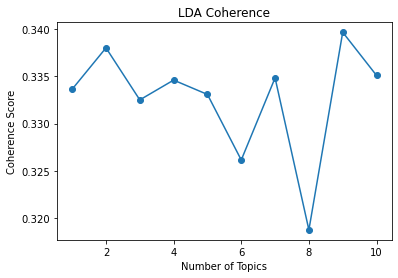

In [19]:
# Plotting coherence scores

plt.plot(range(1, len(model_list) + 1), coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence")

plt.show()


What is the optimal number of topics for your model?

In [25]:
# Get highest coherence score along with number of topics. The index does not show the 0 at the end so it was added for printing purposes.
optimal_score= max(coherence_values)
optimal_topic_number = coherence_values.index(optimal_score) + 1

print(f'The optimal number of topics for this model is {optimal_num_topics}0')

The optimal number of topics for this model is 90


## Question 7: Fitting the Final LDA Model on the Entire Dataset (4 points)

### Objective:
Having identified the optimal number of topics using the coherence model in Gensim, your task now is to apply this knowledge to fit the final LDA (Latent Dirichlet Allocation) model on the entire dataset.

### Instructions:

1. **Optimal Number of Topics**:
   - Recall the optimal number of topics you determined using the coherence model on a sample of your dataset.
   
2. **Preprocess the Full Dataset**:
   - Ensure that the entire dataset is properly preprocessed (tokenization, removing stopwords, etc.).
   - Create a dictionary and a bag-of-words corpus using the full dataset.

3. **Fit the LDA Model**:
   - Instantiate and train the LDA model on the entire dataset using the optimal number of topics you previously determined.
   - Use the same model parameters that were most effective during your experimentation with the sample.

4. **Model Evaluation**:
   - Briefly evaluate the model by examining the coherence score on the full dataset.
   - Display the top words for each topic and provide a brief interpretation.

5. **Reflection**:
   - Reflect on any differences observed in topic quality and coherence when the model is applied to the entire dataset versus the sample.

In [20]:
# 1.Preprocess full dataset

#Read full data set
full_df=pd.read_csv('fake.csv')

#Use only english text as it improves coherence of word distribution
full_df= full_df[(full_df["language"]=="english")]
english_df=full_df['text'].tolist()

#Add custom stopwords to further improve the selection of topics 
custom_stopwords = ["also", "u", "one", "would", "like", "could", "new", "even", "said", "many", "get", "see", "need", "make", "v", "thing", "may"]



#Reuse preprocess function for full data

def preprocess_text_final(text):
    #Set stopwords from nlkt library
    stop= set(stopwords.words('english'))
    stop.update(custom_stopwords)

    if not isinstance(text, float):
    #Remove punctuation
        txt=text.maketrans("", "", string.punctuation)
        pun_removed=text.translate(txt)

    #Transform to lowercase
        lowercase_words= text.lower()

    #Tokenize words
        tokens=lowercase_words.split()
    
    #Lemmatize words
        lem_words=[lemmatizer.lemmatize(x) for x in tokens if x not in stop and x.isalpha()]
        return(lem_words)

processed_txt=[preprocess_text_final(text) for text in english_df ]

result= [text for text in processed_txt if text]

In [21]:
# 2.Fit LDA Model

#Corpus
dictionary_all= corpora.Dictionary(result)

#Matrix
corpus = [dictionary_all.doc2bow(word) for word in result]

#Create LDA Model with optimal number of topics
lda_model_all = LdaModel(corpus=corpus, id2word= dictionary_all, num_topics=90 )

In [22]:
# 3.Display top words for each topic
full_data_topics= [lda_model_all.get_document_topics(topic) for topic in corpus]

#Find most representative words
all_words=lda_model_all.print_topics()
for idx,topic in all_words:
    print(f'Topic:{idx}\nDistribution of representative words: {topic}')

Topic:37
Distribution of representative words: 0.023*"breitbart" + 0.022*"crash" + 0.019*"bannon" + 0.018*"militancy" + 0.014*"sec" + 0.009*"po" + 0.009*"pension" + 0.008*"tiger" + 0.008*"loophole" + 0.007*"helicopter"
Topic:77
Distribution of representative words: 0.039*"tank" + 0.016*"war" + 0.011*"think" + 0.011*"learned" + 0.011*"garner" + 0.010*"money" + 0.008*"u" + 0.008*"iraq" + 0.007*"estimate" + 0.007*"allen"
Topic:45
Distribution of representative words: 0.054*"seth" + 0.028*"mum" + 0.027*"pakistani" + 0.013*"samantha" + 0.012*"bravely" + 0.008*"wtf" + 0.008*"loc" + 0.008*"trucking" + 0.005*"babbling" + 0.005*"carlson"
Topic:8
Distribution of representative words: 0.033*"juan" + 0.022*"white" + 0.011*"nourish" + 0.011*"ttip" + 0.009*"affirmative" + 0.009*"messy" + 0.009*"jersey" + 0.009*"anniversary" + 0.008*"proliferated" + 0.008*"christendom"
Topic:15
Distribution of representative words: 0.035*"trump" + 0.031*"clinton" + 0.028*"hillary" + 0.011*"donald" + 0.009*"election" 

In [23]:
# 4.Evaluate mdoel using coherence
from gensim.models.coherencemodel import CoherenceModel

coherence_score = CoherenceModel(model=lda_model_all, texts=result, dictionary=dictionary_all, coherence='c_v')
final_score= coherence_score.get_coherence()
print(f'Coherence score for full data is {final_score}')

Coherence score for full data is 0.461292916892368


Reflection

ANSWER: When modeling the full dataset, the coherence score increases in comparison to the score obtained after analysing only a sample. In terms of topics, now that the entire data is analsysed, new subjects and words have emerged. Despite that, when reading over the most frequent words in each topic, it is easier to understand the main point of the articles in comparison to the sample.